In [1]:
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import codecs

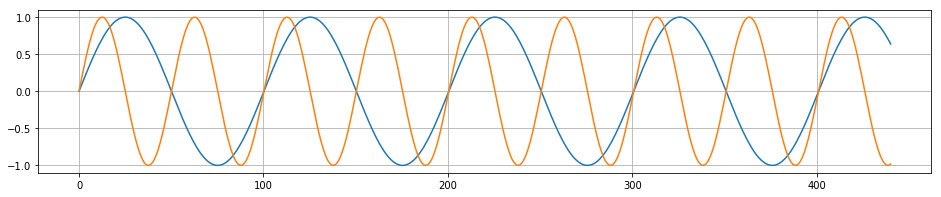

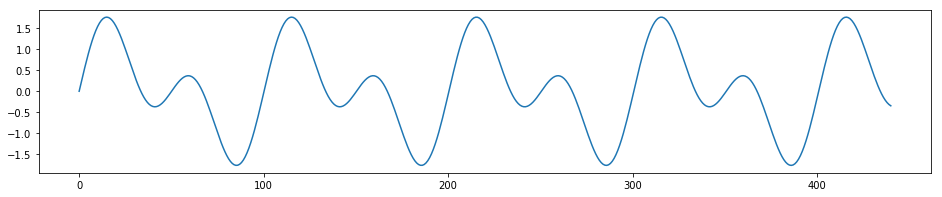

In [2]:
fs = 44100 # 22050
f1 = 440 # 440Hz
samples = fs * 5 # 5 seceonds
x1 = np.arange(samples)
y1 = np.array([np.sin(2*np.pi*f1 * (i/fs)) for i in x1])

f2 = 2*f1
sample = fs * 5
x2 = np.arange(sample)
y2 = np.array([np.sin(2*np.pi*f2 * (i/fs)) for i in x2])

plt.figure(figsize=[16,3])
#plt.subplot(331)
plt.plot(x1[:(fs//100)], y1[:(fs//100)]); # show the wave within 100 ms
#plt.subplot(332)
plt.plot(x2[:(fs//100)], y2[:(fs//100)]); # show the wave within 100 ms
plt.grid()

y = y1 + y2
plt.figure(figsize=[16,3])
#plt.stem(x2,y,'r',)
plt.plot(x2[:(fs//100)], y[:(fs//100)]); # show the wave within 100 ms

In [3]:
ipd.Audio(y1, rate=fs)

In [4]:
ipd.Audio(y2, rate=fs)

(2049, 72)


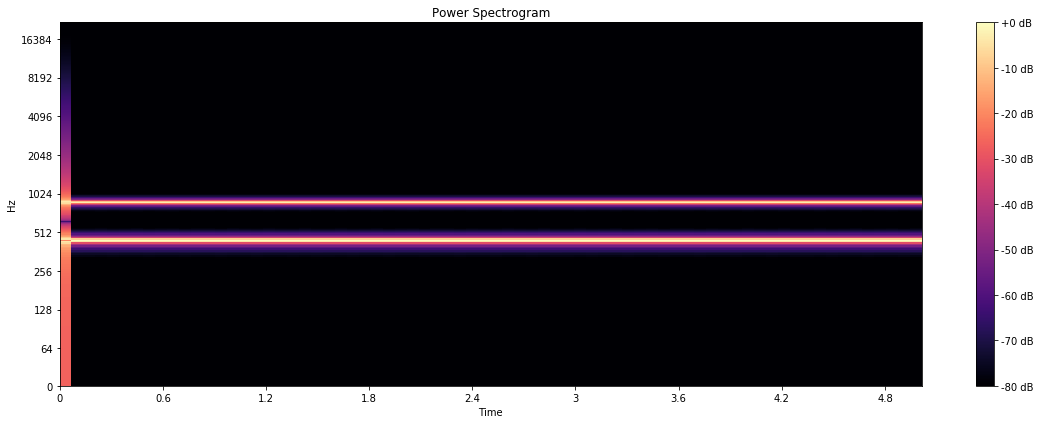

In [5]:
sr = fs
n_fft = 4096 # if sr==22050 else 1024
hop_length = int(n_fft*0.75) # hop samples, high hop low overlap, default hop_length = n_fft//4, hop_length = n_fft means no overlap
linear_ft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
print(linear_ft.shape)
plt.figure(figsize=[16,6])
librosa.display.specshow(librosa.amplitude_to_db(linear_ft, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
#librosa.display.specshow(np.abs(linear_ft), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.title('Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()